In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

Let's make a picture.

We can use pictures like this to train a model to:
1. Determine whether a picture contains a seven or not
2. Find instances of seven in a picture

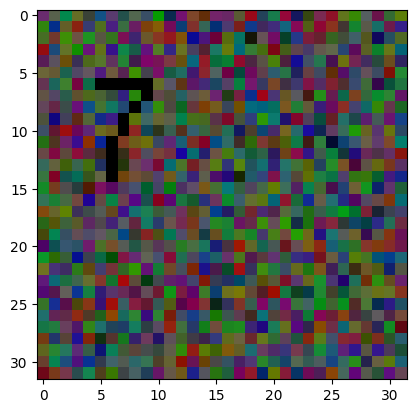

In [4]:
rng = np.random.default_rng()
image_r = rng.random((32,32))
image_g = rng.random((32,32))
image_b = rng.random((32,32))
image = make_lupton_rgb(image_r, image_g, image_b, stretch=1)
seven = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 3], [3,2], [4, 2], [5, 1], [6, 1], [7, 1], [8, 1]]
randomx = np.random.randint(2, 20)
randomy = np.random.randint(3, 20)
for pixel in seven:
    image[randomx+pixel[0], randomy+pixel[1]] = (0, 0, 0)
plt.imshow(image)

For this picture:
- What is the shape?
- Where is the seven?
- How would you linearize the array for feeding into a MLP?
- How wide would the input layer of that MLP?
- What would be the minimum distance between R/G/B valued pixels in your linearization?

In [5]:
print(image.shape)
print(image.shape[0]*image.shape[1]*image.shape[2])
#towards the middle left side of the image
#row major flattening
print(len(image.flatten()))
#input layer would be 3072 perceptrons wide
# minimum distance would be 1024 pixels appart
def smallImage():
    image_r = np.ones((3,3))
    image_g = np.ones((3,3)) *2
    image_b = np.ones((3,3)) *3
    image = make_lupton_rgb(image_r, image_g, image_b, stretch=1)
    print(image.shape)
    flat = image.flatten(order = 'F')
    print(np.shape(flat))
    print(flat)

smallImage()

(32, 32, 3)
3072
3072
(3, 3, 3)
(27,)
[ 60  60  60  60  60  60  60  60  60 120 120 120 120 120 120 120 120 120
 180 180 180 180 180 180 180 180 180]


Okay, so we have established that we need a model that is:
* translation invariant
* efficient 
* capable of capturing local context

We can do this by using **convolutional neural networks**. Today we are going to focus on the nature of *convolution*. 

*Convolutions* construct features over local regions in the input data using convolution *kernels*. Here's a sample kernel:

In [6]:
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

Take a few minutes and define a function that will apply this kernel starting from the top left of the input image and working to the bottom right. At each stop, if the kernel is $Y$ and the subarray of the picture is $X$, calculate $\sum_{i,j} x_{i,j}*y_{i,j}$.
* What is the shape of the output of the convolution?
* Does it give information useful for finding sevens?
* How do you apply the kernel across R/G/B?
* What do you do at the edges?
* Does this kernel really need to be applied pixel by pixel, or could we skip some pixels?

In [18]:
def convolution(image,kernel, chanels =[0,1,2], stride = 0, pad = 0):
    res = np.zeros(image.shape)
    for i in range(image.shape[0]-kernel.shape[0]):
        #which row, and make sure that 
        for j in range(image.shape[1]-kernel.shape[1]):
            #which channel
            #for k in range(image.shape[2]):
            image_Slice = image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            res[i,j] = np.sum(np.multiply(image_Slice, kernel))
    return res

print(convolution(image,kernel))

[[[-193. -193. -193.]
  [1345. 1345. 1345.]
  [  53.   53.   53.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[-316. -316. -316.]
  [1247. 1247. 1247.]
  [ 343.  343.  343.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[ -50.  -50.  -50.]
  [1070. 1070. 1070.]
  [ 516.  516.  516.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 ...

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ...
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]]


Let's pause a minute and talk about:
* *padding*
* *channels*
* *stride*
* *cross-correlation*
* *feature map*
* *receptive field*

## Resources

* https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/
* https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
* https://deeplizard.com/resource/pavq7noze2
* https://poloclub.github.io/cnn-explainer/